#  Image stitching Using OpenCV


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [9]:
def stitch_images(image1, image2):
    # Detect ORB keypoints and descriptors
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    # Use Brute-Force Matcher to find the best matches
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Sort the matches based on their distances
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract matched keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Find the homography matrix
    homography_matrix, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp the second image to align with the first image
    warped_image = cv2.warpPerspective(image2, homography_matrix, (image1.shape[1] + image2.shape[1], image2.shape[0]))

    # Combine the two images
    result = np.zeros_like(warped_image)
    result[:image1.shape[0], :image1.shape[1]] = image1
    result = cv2.addWeighted(result, 0.5, warped_image, 0.5, 0)

    return result


In [10]:
# Load two images to stitch
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('image2.jpg')

# Convert images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


In [11]:
# Stitch the images
result_image = stitch_images(gray_image1, gray_image2)


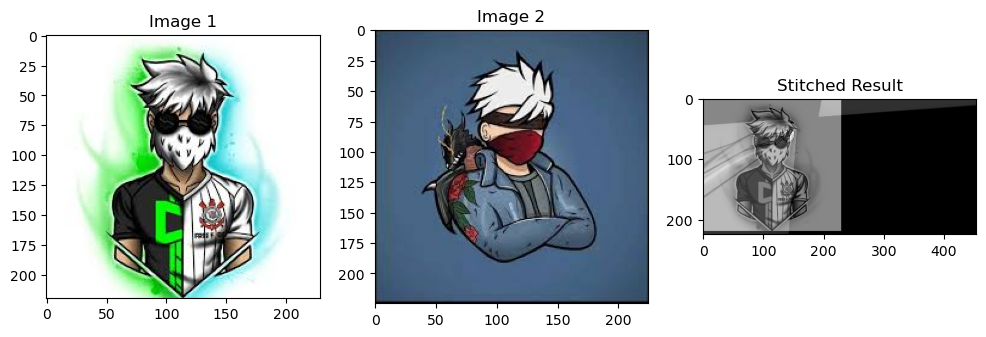

In [12]:
# Display the original images and the stitched result
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Image 1')
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Image 2')
plt.subplot(1, 3, 3), plt.imshow(result_image, cmap='gray'), plt.title('Stitched Result')
plt.show()
